# Stock Price Prediction

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
<!-- * [Objectives](#objectives) -->
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Feature Engineering](#feature-engineering)
* [ML Algorithms](#ml-algorithms)
    * [Logistic Regression](#logistic-regression)
    * [Decision Tree](#decision-tree)
    * [Random Forest](#random-forest)
    * [Gradient Boosting Ensemble](#gradient-boosting-ensemble)
* [Deep Learning Algorithm](#deep-learning-algorithm)

<a name="business-problem-statement"></a>
# Business Problem Statement:

The objective is to implement a binary classification model. The aim is not to precisely predict the stock price, given the intricacies and volatility of the stock market, but rather to ascertain the direction of the price movement for the upcoming day. The binary classification task involves predicting whether the closing price on the next day will be higher or lower than the opening price. This forecast will guide decisions on buying or selling stocks – recommending buying if the prediction is an increase in price and selling otherwise.








<div style="text-align:center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*NpT5pyemQQsGEHXbfS51Zw.png" alt="Image Alt Text" />
</div>


<a name="data-description"></a>
# Data Description:

We possess historical data spanning from the year 1997 to 2020, meticulously divided into three distinct periods: training (1997-2016), validation (2016-2018), and testing (2018-2020). This dataset is stored in three separate files: AMZN_train.csv, AMZN_val.csv, and AMZN_test.csv.

All datasets share a consistent format, featuring seven columns:

1. **Date** - Representing the date in the format YYYY-MM-DD.

2. **Open** - Reflecting the stock price at the commencement of an exchange.

3. **High** - Indicating the highest stock price observed on a given day.

4. **Low** - Denoting the lowest stock price recorded on a given day.

5. **Close** - Depicting the stock price at the conclusion of a trading day.

6. **Adj Close** - Signifying the adjusted closing price, considering corporate actions.

7. **Volume** - Representing the total number of shares traded throughout a trading day.


<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis:


In our preliminary analysis, we aim to load the datasets and examine the available data attributes. By visualizing the variables, we intend to identify potential trends within the data and assess the feasibility of creating supplementary features. Our data loading and analysis will be conducted using the pandas library. Therefore, let's initiate the exploration by importing the pandas library and loading the training data from CSV file.

In [25]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
# Load the training set
training_data = pd.read_csv("C:\\Users\\WalkingTree\\Downloads\\UPW Predicting Stock Price - Amazon\\datasets\\datasets\\AMZN_train.csv")


Displaying the time range of the training data, provides an overview of the temporal scope covered by the dataset.

In [5]:

# Display time range
print("Time Range:", training_data["Date"].min(), training_data["Date"].max())


Time Range: 1997-05-15 2016-05-13


Creating bar plot using matplot lib library

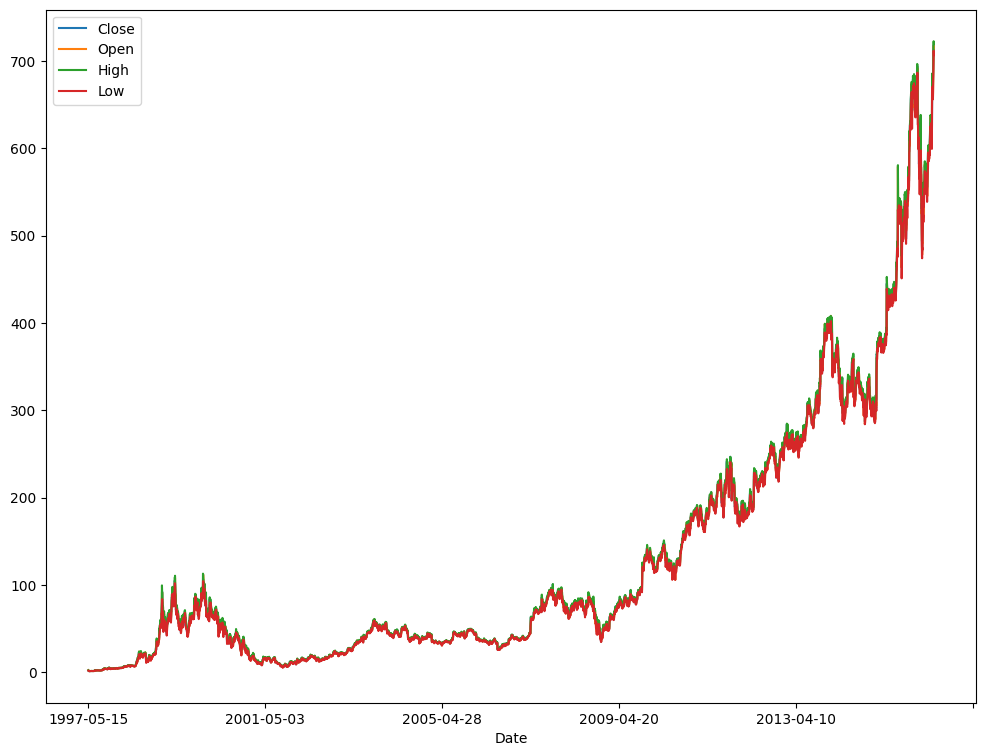

In [7]:
# Set plot size
plt.rcParams["figure.figsize"] = (12, 9)

# Plot stock prices
_ = training_data.plot(x="Date", y=["Close", "Open", "High", "Low"])

Below function conducts an exploratory analysis of the given dataset. It prints the shape, column names, data types, basic statistics, and the date range of the dataset. Additionally, it generates a line plot of stock prices (Close, Open, High, Low) over time using matplotlib

In [8]:
def explore_data(data):
    """Run an exploration analysis of the data."""
    print("Data Shape:", data.shape, "\n")
    print("Columns:", data.columns, "\n")
    data.info()
    print("\n", data.describe(), "\n")
    print("Data ranges from", data["Date"].min(), "to", data["Date"].max())
    data.plot(x="Date", y=["Close", "Open", "High", "Low"])



The code reads the validation and test datasets from CSV files, then applies the explore_data function to analyze each dataset. The function prints information about the datasets, including their shape, column names, data types, basic statistics, and the date range. It also generates line plots of stock prices (Close, Open, High, Low) over time for both datasets.

Data Shape: (503, 7) 

Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359

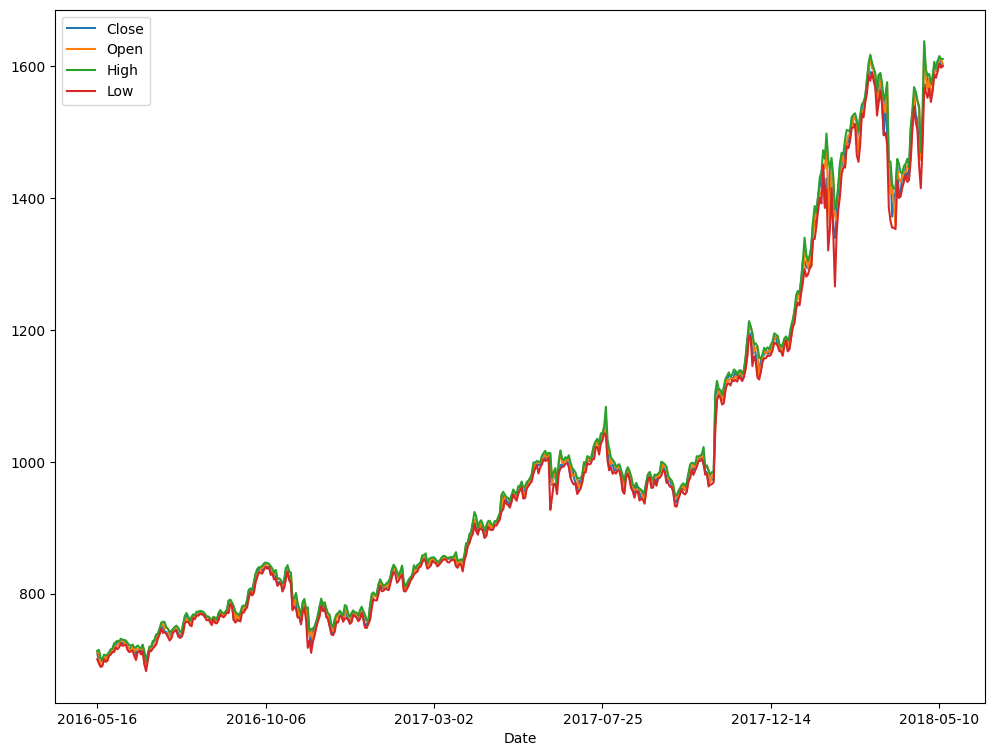

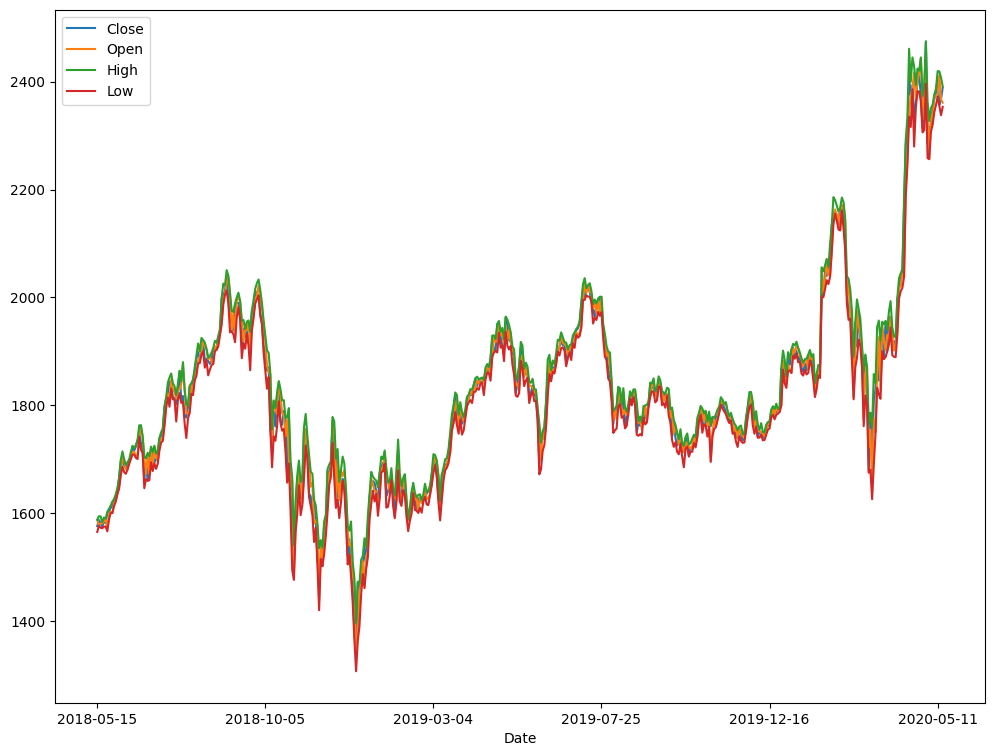

In [11]:
# Read validation and test sets, and analyze them
validation_data = pd.read_csv("C:\\Users\\WalkingTree\\Downloads\\UPW Predicting Stock Price - Amazon\\datasets\\datasets\\AMZN_val.csv")
explore_data(validation_data)

test_data = pd.read_csv("C:\\Users\\WalkingTree\\Downloads\\UPW Predicting Stock Price - Amazon\\datasets\\datasets\\AMZN_test.csv")
explore_data(test_data)

 With the below code ensuring that the training, validation, and test datasets are sorted in ascending order based on the "Date" column. This is crucial for time-series data analysis and modeling. The sort_values method is applied to each dataset in place to maintain the sorted order.

In [13]:
# Ensure data is sorted by date
training_data.sort_values(by="Date", inplace=True)
validation_data.sort_values(by="Date", inplace=True)
test_data.sort_values(by="Date", inplace=True)

 creating a "Target" column in each dataset (training, validation, and test) to represent the predicted binary classification label. The label is determined based on whether the closing stock price on a given day is higher than the opening price. The shift method is used to shift the target values by one day into the future. If the closing price is predicted to be higher than the opening price, the target is set to 1; otherwise, it is set to 0.

In [14]:

# Create a target column
training_data["Target"] = (training_data["Close"] > training_data["Open"]).shift(periods=-1, fill_value=0).astype(int)
validation_data["Target"] = (validation_data["Close"] > validation_data["Open"]).shift(periods=-1, fill_value=0).astype(int)
test_data["Target"] = (test_data["Close"] > test_data["Open"]).shift(periods=-1, fill_value=0).astype(int)


<a name="feature-engineering"></a>
# Feature Engineering   

The stock prices are influenced by previous days' values, indicating a time-dependent relationship. To capture trends or magnitude of price change, we can employ moving averages. Utilizing Pandas' rolling method, we can perform sliding window calculations. In the subsequent steps, we compute 3- and 7-day moving averages, incorporating them as features in the dataset. It's crucial to note that the data must remain sorted by date for the rolling() method to yield valid results


The code calculates and creates two moving average columns, namely "Moving_Average_3" and "Moving_Average_7," for each dataset (training, validation, and test). These moving averages are computed based on the difference between the closing and opening stock prices. The rolling window size is set to 3 for "Moving_Average_3" and 7 for "Moving_Average_7," with a minimum period of 1. The mean value is taken for each rolling window, providing smoothed trends in the data.

In [15]:

# Create moving averages
training_data["Moving_Average_3"] = (training_data["Close"] - training_data["Open"]).rolling(window=3, min_periods=1).mean()
validation_data["Moving_Average_3"] = (validation_data["Close"] - validation_data["Open"]).rolling(window=3, min_periods=1).mean()
test_data["Moving_Average_3"] = (test_data["Close"] - test_data["Open"]).rolling(window=3, min_periods=1).mean()

training_data["Moving_Average_7"] = (training_data["Close"] - training_data["Open"]).rolling(window=7, min_periods=1).mean()
validation_data["Moving_Average_7"] = (validation_data["Close"] - validation_data["Open"]).rolling(window=7, min_periods=1).mean()
test_data["Moving_Average_7"] = (test_data["Close"] - test_data["Open"]).rolling(window=7, min_periods=1).mean()

calculating two additional columns for each dataset (training, validation, and test): "Today_Direction" and "Price_Range."

1. **Today_Direction**: It represents the difference between the closing and opening stock prices for a given day. This column provides information about the direction of price movement for each day.

2. **Price_Range**: It represents the difference between the highest and lowest stock prices on a given day. This column captures the range of price fluctuation within a day.

In [16]:
# Calculate price direction and range
training_data["Today_Direction"] = training_data["Close"] - training_data["Open"]
validation_data["Today_Direction"] = validation_data["Close"] - validation_data["Open"]
test_data["Today_Direction"] = test_data["Close"] - test_data["Open"]

training_data["Price_Range"] = training_data["High"] - training_data["Low"]
validation_data["Price_Range"] = validation_data["High"] - validation_data["Low"]
test_data["Price_Range"] = test_data["High"] - test_data["Low"]


displays a random sample of 10 rows from the training dataset, using a random seed (random_state) for reproducibility, intending to provide a quick overview of the data and its structure.

In [17]:
# Display a sample of the training set
training_data.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


<a name="ml-algorithms"></a>
# ML Algorithms

Defining the target column and input features for training a machine learning model and the input features include various stock-related parameters such as Open, Close, High, Low, Volume, Adj Close, Today_Direction, Price_Range, Moving_Average_3, and Moving_Average_7. The data for both training and validation sets is then extracted based on these specified columns.

In [18]:
# Define target and input features
target_col = "Target"
features_cols = ["Open", "Close", "High", "Low", "Volume", "Adj Close", "Today_Direction", 
                 "Price_Range", "Moving_Average_3", "Moving_Average_7"]

X_train = training_data[features_cols]
y_train = training_data[target_col]
X_val = validation_data[features_cols]
y_val = validation_data[target_col]
X_test = validation_data[features_cols]
y_test = validation_data[target_col]

 Importing specific modules from the scikit-learn library for building a logistic regression model along with standard scaler for feature engineering & ROC curve display for evaluating the performance of binary classification models. 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

setting  random seed (RANDOM_SEED) to a specific value for the purpose of reproducibility.

In [27]:
# Set random seed for reproducibility
RANDOM_SEED = 42

Fitting a Logistic Regression model using the training data, after fitting the model, it uses RocCurveDisplay.from_estimator from scikit-learn's metrics module to plot the ROC (Receiver Operating Characteristic) curve for the validation set. The ROC curve is a graphical representation of the model's performance across different classification thresholds.

<a name="logistic-regression"></a>
# Logistic Regression   

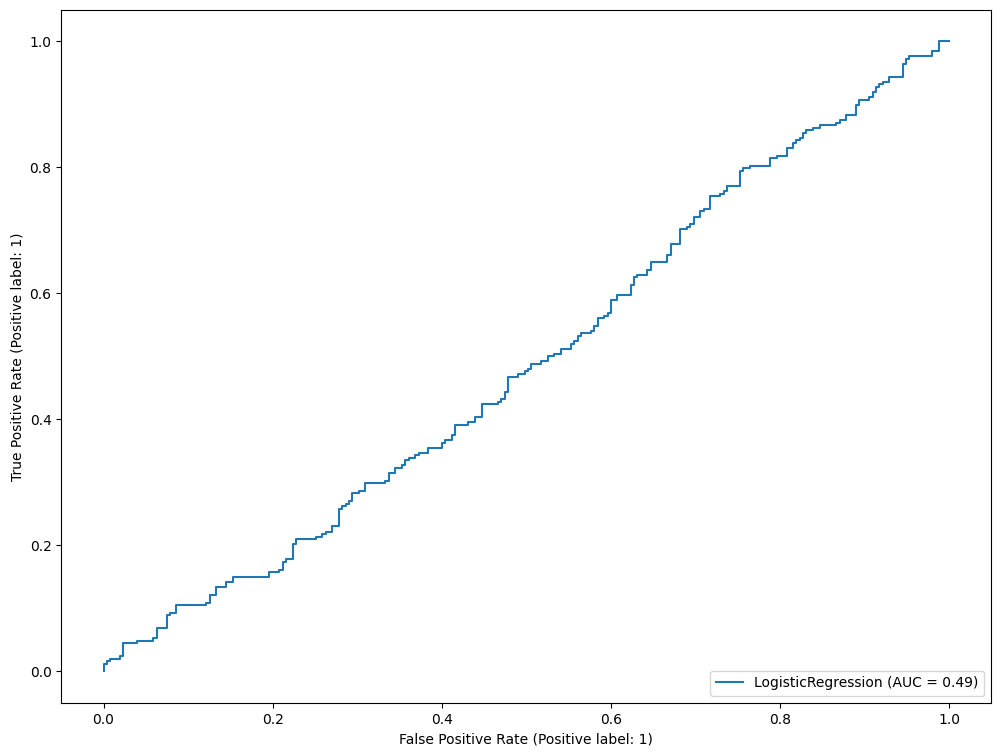

In [32]:
# Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(logistic_regression_model, X_val, y_val)

<a name="decision-tree"></a>
# Decision Tree  

Fitting Decision Tree model (decision_tree_model) using the training data, after fitting the model, it uses RocCurveDisplay.from_estimator from scikit-learn's metrics module to plot the ROC (Receiver Operating Characteristic) curve for the validation set. The ROC curve is a graphical representation of the model's performance across different classification thresholds.

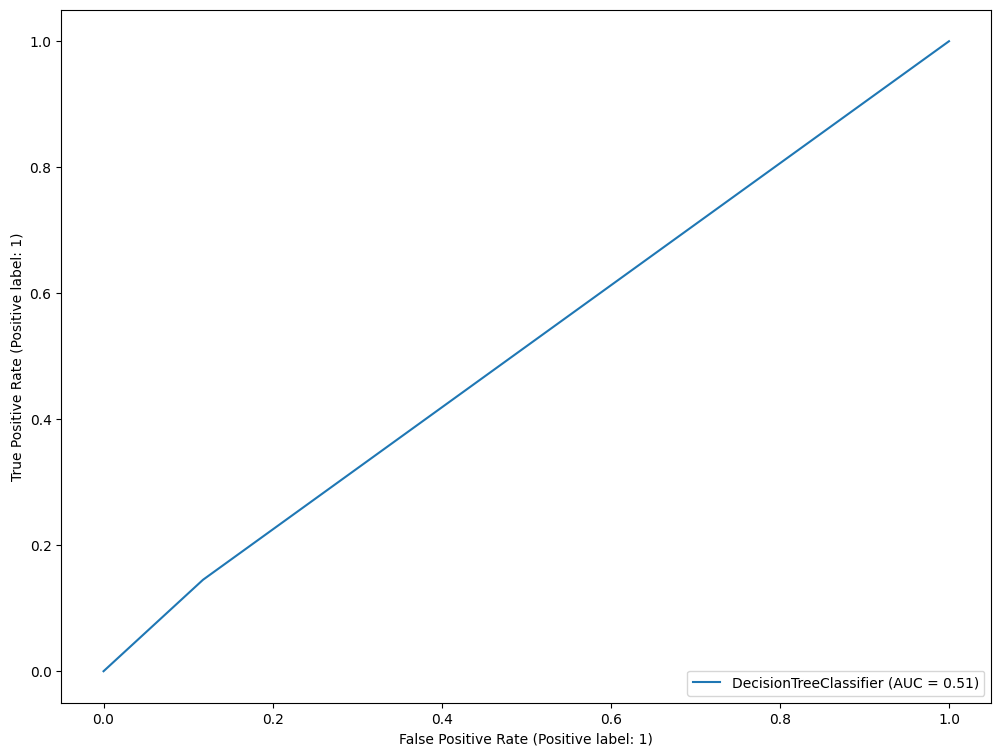

In [33]:
# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
decision_tree_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(decision_tree_model, X_val, y_val)

<a name="random-forest"></a>
# Random Forest

Utilizing an ensemble model known as a Random Forest. This model consists of multiple decision trees, each constructed with a distinct subset of attributes chosen randomly.


Fitting Random Forest model using the training data after fitting the model, it utilizes RocCurveDisplay.from_estimator from scikit-learn's metrics module to plot the ROC (Receiver Operating Characteristic) curve for the validation set. The ROC curve illustrates the model's performance across different classification thresholds.

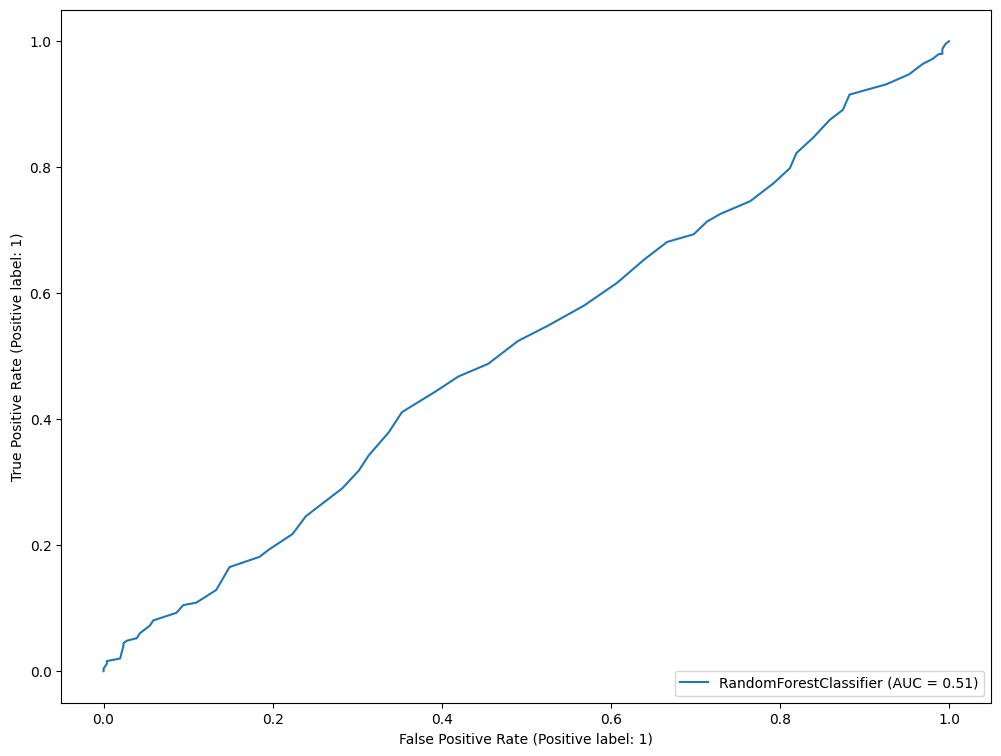

In [34]:

# Random Forest model
random_forest_model = RandomForestClassifier(random_state=RANDOM_SEED)
random_forest_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(random_forest_model, X_val, y_val)

<a name="gradient-boosting-ensemble"></a>
# Gradient Boosting Ensemble

Creating a Gradient Boosting model using scikit-learn's GradientBoostingClassifier. After fitting the model with the training data, it uses RocCurveDisplay.from_estimator to plot the ROC (Receiver Operating Characteristic) curve for the validation set. The ROC curve visualizes the trade-off between sensitivity and specificity for different classification thresholds.

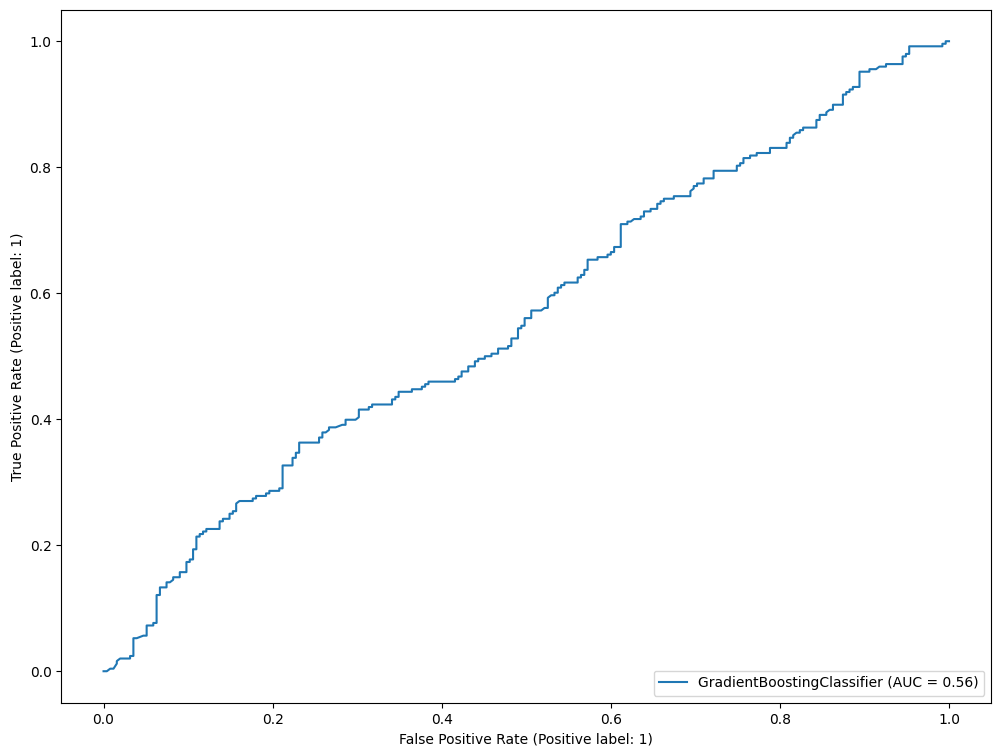

In [35]:
# Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=RANDOM_SEED)
gradient_boosting_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(gradient_boosting_model, X_val, y_val)

<a name="data-description"></a>
# Deep Learning Algorithm

Creating a neural network model using TensorFlow.

Neural Network Model Architecture:

    1. Input Layer: Normalization.
        Hidden Layers: Two dense layers with ReLU activation, dropout for regularization, and appropriate initializers.
        Output Layer: Dense layer with sigmoid activation for binary classification.
    2. Compilation:
        Binary crossentropy loss function and Adam optimizer are utilized.
        AUC (Area Under the Curve) is chosen as the evaluation metric.
    3. Callbacks:Learning rate decay (lr_scheduler_cb) and early stopping (early_stopping_cb) callbacks are implemented.

In [36]:

# TensorFlow Neural Network model
tf.random.set_seed(RANDOM_SEED)
print("Tensorflow version", tf.__version__)

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

nn_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['AUC']
)

def lr_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

Tensorflow version 2.13.1


Enabling the training of the neural network model and monitoring its performance on both the training and validation sets

In [37]:
# Fit the model
training_history = nn_model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_cb, lr_scheduler_cb]
)


Epoch 1/50
150/150 [==============================] - 3s 5ms/step - loss: 88.8132 - auc: 0.4979 - val_loss: 2.7531 - val_auc: 0.4937 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 6.5451 - auc: 0.5001 - val_loss: 0.6975 - val_auc: 0.4924 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 2.4812 - auc: 0.4951 - val_loss: 0.6950 - val_auc: 0.5098 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 2.3317 - auc: 0.4992 - val_loss: 2.4394 - val_auc: 0.5079 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 1.7655 - auc: 0.5013 - val_loss: 0.6939 - val_auc: 0.4925 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1256 - auc: 0.5083 - val_loss: 0.7701 - val_auc: 0.4901 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 1.4850 - auc: 0.5046 - val_loss: 0.7356 - val_auc: 

Visualizing the training history of the neural network model.These plots help assess the model's performance and identify trends, indicating whether the model is learning effectively or if adjustments are needed.

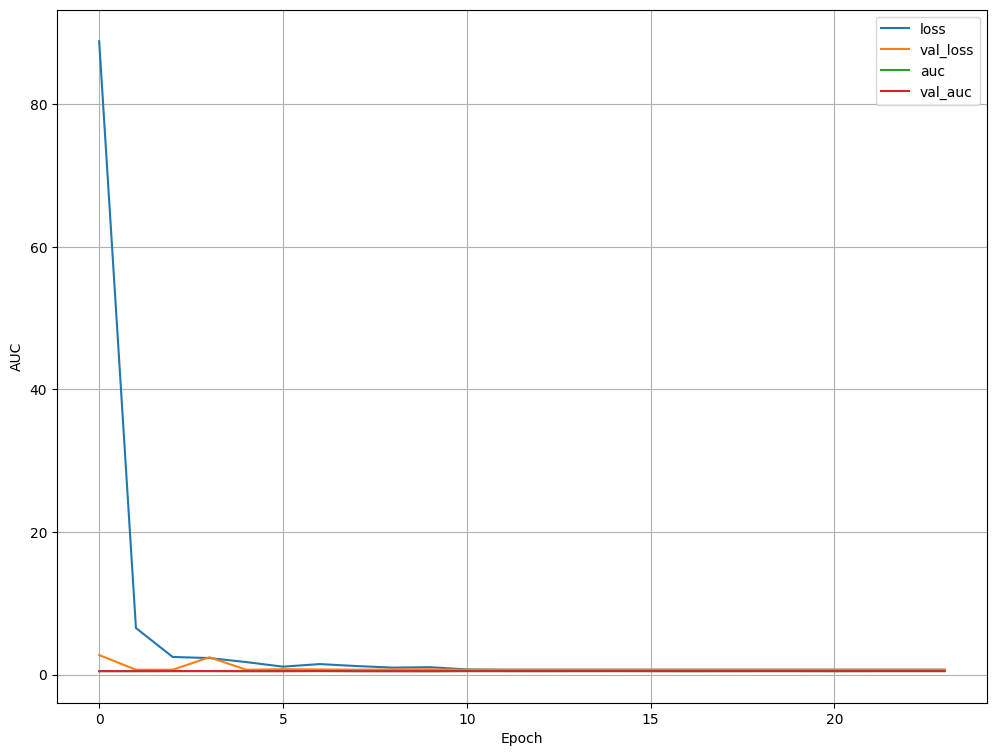

In [38]:

# Plot training history
plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

plt.plot(training_history.history['auc'], label='auc')
plt.plot(training_history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)